# Homework 3 - Introduction to Data Science - Fall 2021

# Guidelines
- If asked to fit a model to given data, do not preprocess the given data before fitting. 
- Use default values for any parameters not mentioned in a problem statement.
- Comment where appropriate for clarity.

# Problem 1

We will apply decision trees to the `Titanic` dataset for prediction of passenger survival. The dataset contains the following variables:

* `Pclass`: Ticket class where 1 = 1st, 2 = 2nd, 3 = 3rd
* `Sex`: Female/male
* `Embarked`: Port of Embarkation where C = Cherbourg, Q = Queenstown, S = Southampton
* `SibSp`: Number of siblings
* `Parch`: Number of parents
* `Age`: Age in years	
* `Fare`: Passenger fare	
* `Survived`: 0 = No, 1 = Yes

In [2]:
import pandas as pd

titanic = pd.read_csv("titanic.csv")

# Select subset of columns.
columns = ['Pclass', 'Sex','Embarked','SibSp', 'Parch','Age','Fare','Survived']
titanic = titanic[columns]

# Fill NA values.
titanic['Embarked'].fillna("S", inplace=True)
med_age = int(titanic['Age'].median())
titanic['Age'].fillna(med_age, inplace=True)

# Encode classes as integers.
titanic['Sex'] = titanic['Sex'].map( {'female': 0, 'male': 1} ).astype(int)
titanic['Embarked'] = titanic['Embarked'].map( {'S': 1, 'C': 2, 'Q': 3} ).astype(int)

# Print.
titanic

,Pclass,Sex,Embarked,SibSp,Parch,Age,Fare,Survived
0,3,1,1,1,0,22.0,7.2500,0
1,1,0,2,1,0,38.0,71.2833,1
2,3,0,1,0,0,26.0,7.9250,1
3,1,0,1,1,0,35.0,53.1000,1
4,3,1,1,0,0,35.0,8.0500,0
...,...,...,...,...,...,...,...,...
886,2,1,1,0,0,27.0,13.0000,0
887,1,0,1,0,0,19.0,30.0000,1
888,3,0,1,1,2,28.0,23.4500,0
889,1,1,2,0,0,26.0,30.0000,1


In [3]:
from sklearn.model_selection import train_test_split

# Test/train split.
X_titan = titanic.drop('Survived', axis = 1)
y_titan = titanic[['Survived']]
X_titan_train, X_titan_test, y_titan_train, y_titan_test = train_test_split(X_titan, y_titan, test_size=1/3, random_state=42)

## 1.1
For `max_depth` ranging from 1 to 50, fit decision tree classifiers using `random_state=42` and store the training and test accuracies in the given variables.

Best prediction accuracy:  0.8215488215488216
Depth:  3


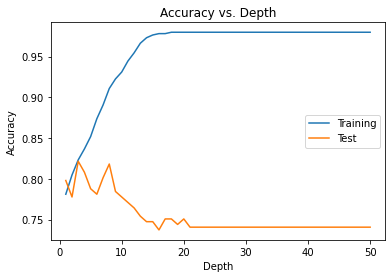

In [4]:
import numpy as np
from sklearn import tree
from sklearn.metrics import accuracy_score,precision_score
import matplotlib.pyplot as plt

depth = np.arange(1,51,1)
dtaccuracy_train = [] # List for storing training accuracies.
dtaccuracy_test = [] # List for storing test accuracies.

### YOUR CODE HERE:

for d in depth:
    clf = tree.DecisionTreeClassifier(max_depth=d,random_state=42)
    clf.fit(X_titan_train,y_titan_train)
    pred1 = clf.predict(X_titan_train)
    pred2 = clf.predict(X_titan_test)
    acc_train = accuracy_score(y_titan_train,pred1)
    acc_test = accuracy_score(y_titan_test,pred2)
    dtaccuracy_train.append(acc_train)
    dtaccuracy_test.append(acc_test)


print("Best prediction accuracy: ", max(dtaccuracy_test))
print("Depth: ", depth[dtaccuracy_test.index(max(dtaccuracy_test))])

plt.plot(depth, dtaccuracy_train, label = "Training")
plt.plot(depth, dtaccuracy_test, label = "Test")
plt.xlabel("Depth")
plt.ylabel("Accuracy")
plt.title("Accuracy vs. Depth")
plt.legend()
plt.show()

## 1.2
What trends do you observe in the training and test accuracies as depth increases? Explain these trends.

### Answer:
As depth increases to 20, the accuracy of traning set increases to its maximun while the accuracy of test set begins to decrease. In conclusion, when the depth exceeds to much, the model tends to be overfitting.

## 1.3
For the decision tree with the best test accuracy, print the three most important features.

In [5]:
# YOUR CODE HERE:
clf_best = tree.DecisionTreeClassifier(max_depth=3,random_state=42)
clf_best.fit(X_titan_train,y_titan_train)
print(dict(zip(columns,clf_best.feature_importances_)))
print('three most important features:',columns[1],columns[0],columns[6])

{'Pclass': 0.20000379827715362, 'Sex': 0.6044409053437974, 'Embarked': 0.0, 'SibSp': 0.02443212172213357, 'Parch': 0.0, 'Age': 0.07807829412068924, 'Fare': 0.0930448805362263}
three most important features: Sex Pclass Fare


# Problem 2
We continue to explore prediction on the `Titanic` dataset with random forests.

## 2.1
For `n_estimators` ranging from 1 to 201 with step size 10, fit random forest classifiers using `random_state=42` and `max_depth=3`. Store the training and test accuracies in the given variables.

Best prediction accuracy:  0.8282828282828283
Best n_estimators:  [101, 131, 151, 161, 171]


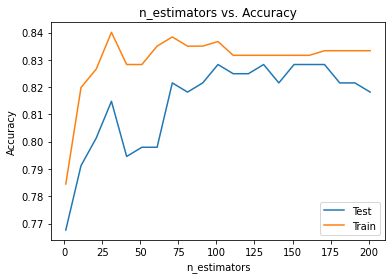

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

rf_arru_lst_test = [] # List for storing training accuracies.
rf_arru_lst_train = [] # List for storing test accuracies.
n_estimators_lst = np.arange(1,202,10)


# YOUR CODE HERE:
for n in n_estimators_lst:
    clf2 = RandomForestClassifier(n_estimators=n,max_depth=3,random_state=42)
    clf2.fit(X_titan_train,y_titan_train.values.ravel())
    pred1 = clf2.predict(X_titan_train)
    pred2 = clf2.predict(X_titan_test)
    acc_train = accuracy_score(y_titan_train,pred1)
    acc_test = accuracy_score(y_titan_test,pred2)
    rf_arru_lst_train.append(acc_train)
    rf_arru_lst_test.append(acc_test)

# print "Best prediction accuracy" and corresponding "n_estimators"
# YOUR CODE HERE:
max_acc =  max(rf_arru_lst_test)
print("Best prediction accuracy: ",max_acc)
max_n = []
for i,acc in enumerate(rf_arru_lst_test):
    if acc == max_acc:
        max_n.append(n_estimators_lst[i])
print("Best n_estimators: ", max_n)

# plot the accuracies
plt.plot(n_estimators_lst, rf_arru_lst_test, label = "Test")
plt.plot(n_estimators_lst, rf_arru_lst_train, label = "Train")
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.title('n_estimators vs. Accuracy')
plt.legend()
plt.show()

## 2.2
What trends do you observe in the training and test accuracies as `n_estimators` increases? Explain these trends.

### Answer:
So far for n_estimators less than 200, the training and testing accuracies tends to increase eventually(with some minor fluctuations). But for n_estimators over 200, the test accuracy may begin to decrease slightly.

## 2.3
`GridSearchCV` is a class to assist in finding the best parameters for a model. Read about `GridSearchCV` here:

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

To use `GridSearchCV`, follow these steps:
* Create your model object.
* Create a dictionary with the model parameters and ranges over which you want to optimize.
* Create a `GridSearchCV` object and fit it on your training data.
* Access the attributes of the `GridSearchCV` object to find the optimal parameters and scores.

For a Random Forest model with `random_state=42`, use `GridSearchCV` with 10-fold CV to determine the best combination of the following parameters:
* `max_depth` ranging from 1 to 10
* `n_estimators` ranging from 1 to 10

Print the best parameters and corresponding score.

In [62]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# create the default model
# YOUR CODE HERE:
depth = np.arange(1,11,1)
n_estimators = np.arange(1,11,1)

# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': depth,
    'n_estimators': n_estimators
}
# Create a based model
rf = RandomForestClassifier(random_state=42)


# Grid of parameters over which to optimize.
# YOUR CODE HERE:

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 10)
# Fit the grid search to the data


# search the grid
# YOUR CODE HERE:
grid_search.fit(X_titan_train, y_titan_train.values.ravel())


# Print the "Best parameters" and its "Score"
# YOUR CODE HERE:
print('Best parameters:',grid_search.best_params_)
print('Score:',grid_search.best_score_)

Best parameters: {'max_depth': 9, 'n_estimators': 10}
Score: 0.831638418079096


# Problem 3

We will apply logistic regression to the problem of classifying images of fashion articles in the [Fashion-MNIST dataset](https://github.com/zalandoresearch/fashion-mnist).

In [54]:
import numpy as np
import pandas as pd

fash = pd.read_csv("fash.csv")
labels = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot"]
fash['label'].replace(to_replace=np.arange(0,10), value=labels, inplace=True)

X_fash = fash.iloc[:, 1:]
y_fash = fash.iloc[:, 0]

display(fash)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,Pullover,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Ankle boot,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Shirt,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,T-shirt/top,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,Dress,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Bag,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
996,Trouser,0,0,0,0,0,0,0,0,0,...,164,0,0,0,0,0,0,0,0,0
997,Coat,0,0,0,0,0,0,0,0,1,...,0,0,0,0,170,193,11,0,0,0
998,Sneaker,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 3.1
Fit a logistic regression model for image classification to the data with `penalty="none"`. Print the first three images using [`matplotlib.pyplot.imshow`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html) along with your model classifications and the predicted probabilities of each class.

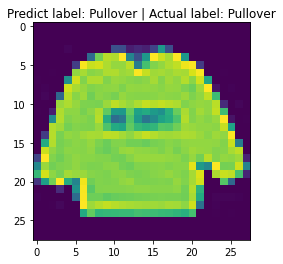

Probabilities of each class:  {'Ankle boot': 0.0, 'Bag': 3.959165444936908e-142, 'Coat': 3.6854278226018264e-77, 'Dress': 0.0, 'Pullover': 1.0, 'Sandal': 0.0, 'Shirt': 8.696906521800325e-167, 'Sneaker': 0.0, 'T-shirt/top': 1.1047054518720219e-246, 'Trouser': 2.579695576238895e-220}


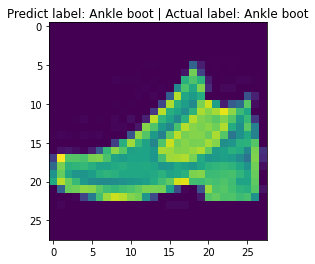

Probabilities of each class:  {'Ankle boot': 1.0, 'Bag': 8.383701074499541e-227, 'Coat': 0.0, 'Dress': 0.0, 'Pullover': 1.590710671808364e-278, 'Sandal': 1.3336230971119898e-100, 'Shirt': 3e-323, 'Sneaker': 1.0233229864082405e-40, 'T-shirt/top': 0.0, 'Trouser': 1.4903474388808167e-308}


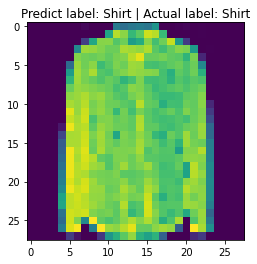

Probabilities of each class:  {'Ankle boot': 0.0, 'Bag': 1.7132207363781892e-222, 'Coat': 8.985723308573693e-93, 'Dress': 1.1961778899167243e-121, 'Pullover': 6.889927129554052e-119, 'Sandal': 0.0, 'Shirt': 1.0, 'Sneaker': 0.0, 'T-shirt/top': 1.737746177604496e-172, 'Trouser': 1.637192673683e-311}


In [122]:
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

# YOUR CODE HERE:
lgr = LogisticRegression(penalty='none')
lgr.fit(X_fash,y_fash.values.ravel())

def display_image(features,actucal_label):
    predict_label = lgr.predict(features.reshape(-1,784))
    plt.imshow(features.reshape(28,28))
    plt.title('Predict label: '+predict_label[0]+' | '+ 'Actual label: '+ actucal_label)
    plt.show()
    print('Probabilities of each class: ', dict(zip(list(lgr.classes_),lgr.predict_proba(features.reshape(-1,784))[0])))
for i in range(3):
    display_image(X_fash.loc[i].values,y_fash.loc[i])
    
y_pred = lgr.predict(X_fash)


## 3.2
In the previous part we used no penalty term. Now we will explore L2 penalization. Answer the following questions in the context of logistic regression:
1. What is L2 penalization?
2. What main benefit does it have and how does it achieve that?

### Answer:
1. A regression model that uses L1 regularization technique is called Lasso Regression and model which uses L2 is called Ridge Regression. The key difference between these two is the penalty term. Ridge regression adds “squared magnitude” of coefficient as penalty term to the loss function.


2. The main benefit of L2 regularization is that it shrinks the less important feature’s coefficient to zero thus, removing some feature altogether. So, this works well for feature selection in case we have a huge number of features.
Traditional methods like cross-validation, stepwise regression to handle overfitting and perform feature selection work well with a small set of features but these techniques are a great alternative when we are dealing with a large set of features.

## 3.3
Fit logistic regression models to the data using L2 regularization and the given values of `C`. Determine the optimal value of the inverse regularization strength parameter $C$ by performing 5-fold cross-validation. Plot the averaged `accuracy_score` associated with the each model against $\log(C)$.

Optimal C:  0.01


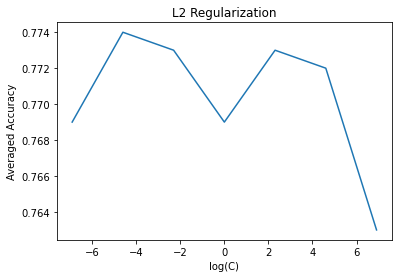

In [157]:
from numpy.linalg import norm
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings("ignore")

C = [1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3]
cv_scores = [0]*7 # List for storing the averaged accuracies.

# YOUR CODE HERE:
i = 0
for c in C:
    clf = LogisticRegression(penalty='l2',C=c)
    test_score = cross_val_score(clf, X_fash, y_fash.values.ravel(), cv=5)
    cv_scores[i] = np.mean(test_score)
    i+=1

# Print the "Optimal C"
# YOUR CODE HERE:
print('Optimal C: ',C[cv_scores.index(max(cv_scores))])

plt.plot(np.log(C), cv_scores)
plt.xlabel("log(C)")
plt.ylabel("Averaged Accuracy")
plt.title("L2 Regularization")
plt.show()

## 3.4
Perform a random 80/20 split into training and test data set and use the optimal `C` of Problem 3.3 to train a logistic regression model. Plot the confusion matrix of the test set.

Overall accuracy: 76.5 %


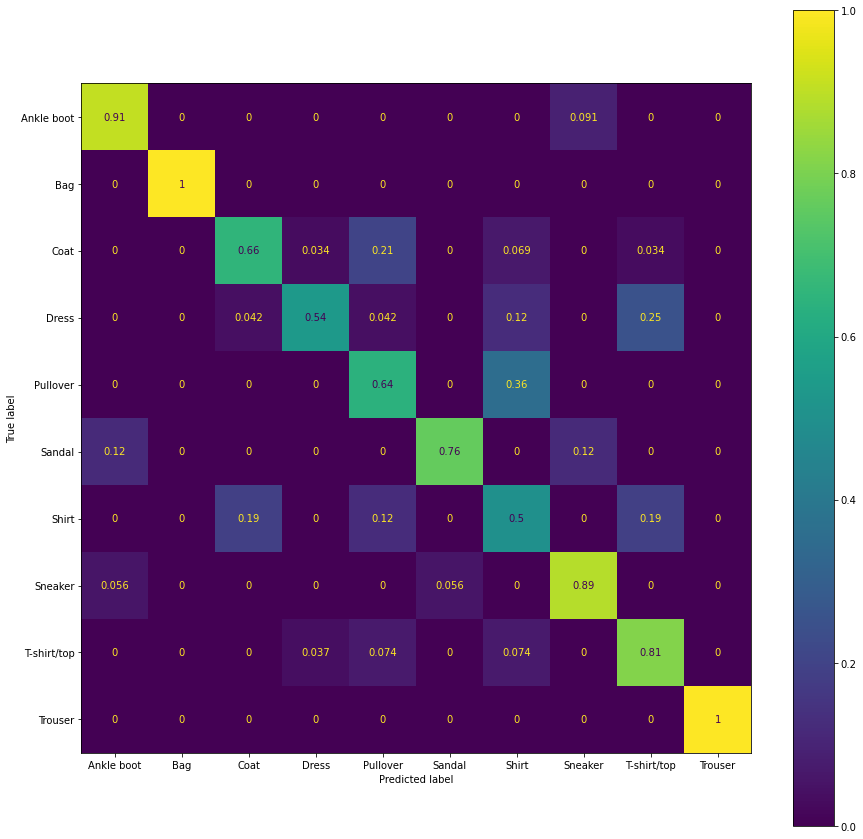

In [169]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix,confusion_matrix

# YOUR CODE HERE:
C = 0.01

X_train, X_test, y_train, y_test = train_test_split(X_fash,y_fash,test_size= 0.2)
clf = LogisticRegression(penalty='l2',C=C)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
fig, ax = plt.subplots(figsize=(15, 15))
plot_confusion_matrix(clf, X_test, y_test, normalize='true',ax=ax)


# conf_mat = confusion_matrix(y_pred, y_test)
# acc = np.sum(conf_mat.diagonal()) / np.sum(conf_mat)
# print('Overall accuracy: {} %'.format(acc*100))

## 3.5
For this model, which is the class label with the lowest classification accuracy in the test set?

### Answer:
From the confusion matrix, the class 'Shirt' is the class label with the lowest classification accuraccy(0.5).

# Problem 4

We explore classification using support vector machines (SVM) on the [`wine`](https://scikit-learn.org/stable/datasets/toy_dataset.html#wine-dataset) dataset. Wines are divided into class 0 and class 1.

     color_intensity   hue
0               5.64  1.04
1               4.38  1.05
2               5.68  1.03
3               7.80  0.86
4               4.32  1.04
..               ...   ...
173             7.70  0.64
174             7.30  0.70
175            10.20  0.59
176             9.30  0.60
177             9.20  0.61

[178 rows x 2 columns]
0      1
1      1
2      1
3      1
4      1
      ..
173    0
174    0
175    0
176    0
177    0
Name: target, Length: 178, dtype: int32


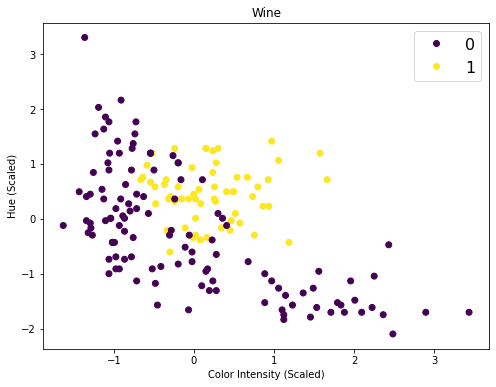

In [170]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

X_wine = datasets.load_wine(as_frame = True).data[['color_intensity', 'hue']]
y_wine = (datasets.load_wine(as_frame = True).target == 0)*1

print(X_wine)
print(y_wine)

# Scale X_wine.
scaler = StandardScaler()
X_wine = scaler.fit_transform(X=X_wine)

fig, ax = plt.subplots(figsize=(8,6));
scatter = ax.scatter(X_wine[:,0], X_wine[:,1],c=y_wine)
ax.legend(handles=scatter.legend_elements()[0],labels=['0','1'], fontsize=16);
ax.set_xlabel("Color Intensity (Scaled)")
ax.set_ylabel("Hue (Scaled)")
ax.set_title("Wine");

## 4.1
Fit an SVM model with a linear kernel to the whole dataset and print the accuracy on the whole dataset.

In [178]:
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.svm import SVC

# YOUR CODE HERE:

model = SVC(kernel='linear') 
model.fit(X_wine,y_wine)
print("Model accuracy using SVM:",model.score(X_wine,y_wine))

Model accuracy using SVM: 0.6853932584269663


## 4.2
Describe qualitatively why SVM with linear kernel has limited accuracy for this dataset.

### Answer:
From the decision boundary plot below, we can see that the classes are not perfectly sepearable, which means it has a non-linear boundarie, and such boundaries will not work well on SVM with linear kernel, so the accracy will be lower that other kernels such as rbf.

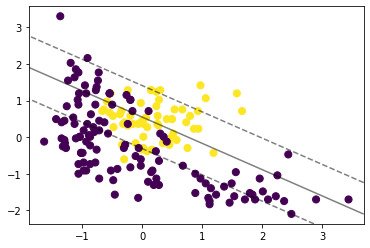

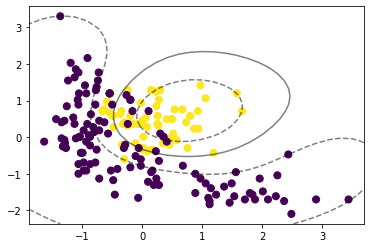

In [182]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
plt.scatter(X_wine[:, 0], X_wine[:, 1], c=y_wine, s=50)
plot_svc_decision_function(model)
plt.show()
model2 = SVC(kernel='rbf') 
model2.fit(X_wine,y_wine)
plt.scatter(X_wine[:, 0], X_wine[:, 1], c=y_wine, s=50)
plot_svc_decision_function(model2)
plt.show()

## 4.3
Perform 10-fold CV with the following two SVM models:
- One using an RBF kernel with C=1.
- One using an RBF kernel with C=1e4.

Print the mean 10-fold CV accuracies of the models.

In [194]:
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.model_selection import cross_val_score

# YOUR CODE HERE:
model1 = SVC(kernel='rbf',C=1) 
model2 = SVC(kernel='rbf',C = 1e4) 

# Print the 'C=1 Mean Accuracy' and the 'C=1e4 Mean Accuracy'
# YOUR CODE HERE:
score1 = cross_val_score(model1,X_wine,y_wine,cv = 10)
acc1 = np.mean(score1)
score2 = cross_val_score(model2,X_wine,y_wine,cv = 10)
acc2 = np.mean(score2)
print('C=1 Mean Accuracy:', acc1)
print('C=1e4 Mean Accuracy:',acc2)

C=1 Mean Accuracy: 0.8549019607843137
C=1e4 Mean Accuracy: 0.8379084967320262


## 4.4
For each of the two models, create a plot showing:
- The decision boundaries and margins, and
- the support vectors (highlighted).

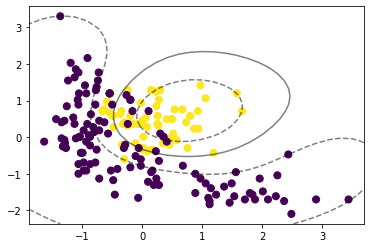

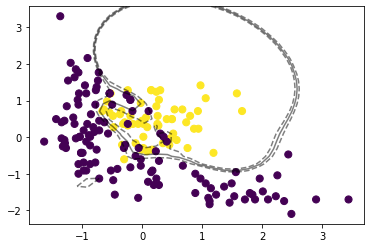

In [199]:
import numpy as np
import matplotlib.pyplot as plt


def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

# Fit the model with C=1.
# YOUR CODE HERE:
model1.fit(X_wine,y_wine)

# Fit the model with C=1e4.
# YOUR CODE HERE:
model2.fit(X_wine,y_wine)

# Plot decision boundary and margins
# YOUR CODE HERE:

plt.scatter(X_wine[:, 0], X_wine[:, 1], c=y_wine, s=50)
plot_svc_decision_function(model1)
plt.show()

plt.scatter(X_wine[:, 0], X_wine[:, 1], c=y_wine, s=50)
plot_svc_decision_function(model2)
plt.show()